In [87]:
import mysql.connector
from mysql.connector import errorcode
import config
db_name= 'Movie Project1'
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    database = db_name
    
)
cursor = cnx.cursor()
print(cnx)

In [88]:
def mysql(query):    
    cursor.execute(query)
    result = cursor.fetchall()

    return result # returns tuples without headers



In [3]:
genres = mysql("SELECT genre, ROUND(AVG(boxoffice-budget), 0) AS avg_return FROM Genres GROUP BY genre ORDER BY avg_return DESC;")
genres

[('3D', 29556315.0),
 ('Animation', 29031991.0),
 ('Rom-Com', 20827509.0),
 ('Horror', 17412297.0),
 ('Gay/Lesbian', 9612395.0)]

[('3D', 29556315.0), ('Animation', 29031991.0), ('Rom-Com', 20827509.0), ('Horror', 17412297.0), ('Gay/Lesbian', 9612395.0)]


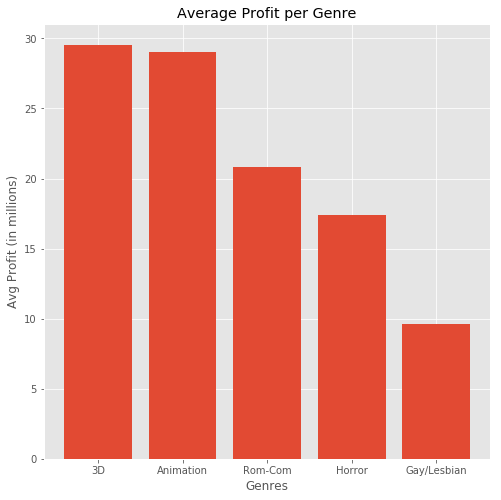

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
print(genres)
xs = [i[0] for i in genres]
ys = [i[1]/1000000 for i in genres]

plt.figure(figsize=(8,8))
plt.bar(xs, ys)
plt.xlabel('Genres')
plt.ylabel('Avg Profit (in millions)')
plt.title('Average Profit per Genre')
plt.show()

In [6]:
_3d = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='3D' ORDER BY returns;")
_ani = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='Animation' ORDER BY returns;")
_hor = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='Horror' ORDER BY returns;")
_rc = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='Rom-Com' ORDER BY returns;")
_gl = mysql("SELECT genre, ROUND((boxoffice-budget), 0) as returns FROM Genres WHERE genre='Gay/Lesbian' ORDER BY returns;")

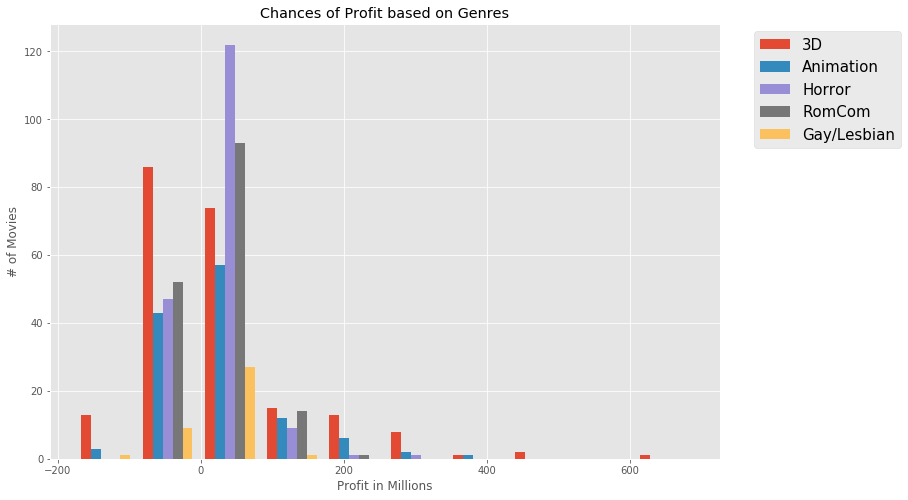

In [161]:
fig = plt.figure(figsize=(12,8))

b = 10
labels = ['3D', 'Animation', 'Horror', 'RomCom', 'Gay/Lesbian']
box_3d = [i[1]/1000000 for i in _3d]
box_an = [i[1]/1000000 for i in _ani]
box_ho = [i[1]/1000000 for i in _hor]
box_rc = [i[1]/1000000 for i in _rc]
box_gl = [i[1]/1000000 for i in _gl]
boxo = [box_3d, box_an, box_ho, box_rc, box_gl]

plt.hist(boxo, bins=b, label=labels)
lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 15})
plt.title('Chances of Profit based on Genres')
plt.ylabel('# of Movies')
plt.xlabel("Profit in Millions")
plt.show()
#fig.savefig('ChancesOfProfit', bbox_extra_artists=(lgd,), bbox_inches='tight')

[('Gay/Lesbian', 73.0), ('Horror', 58.0), ('Rom-Com', 3.0), ('Animation', 2.0), ('3D', 1.0)]


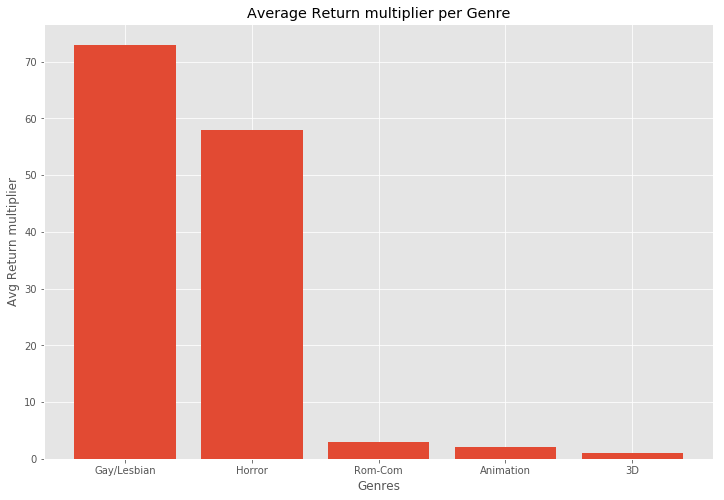

In [90]:
avg_pct_r = mysql("SELECT genre, ROUND(AVG(boxoffice/budget), 0) AS avg_return FROM Genres GROUP BY genre ORDER BY avg_return DESC;")

print(avg_pct_r)
xs = [i[0] for i in avg_pct_r]
ys = [i[1] for i in avg_pct_r]

plt.figure(figsize=(12,8))
plt.bar(xs, ys)
plt.xlabel('Genres')
plt.ylabel('Avg Return multiplier')
plt.title('Average Return multiplier per Genre')
plt.show()


In [30]:
rate_3d = mysql("SELECT ratings, genre FROM Reviews JOIN Genres USING(title) WHERE genre='3D';")
rate_ani = mysql("SELECT ratings, genre FROM Reviews JOIN Genres USING(title) WHERE genre='Animation';")
rate_rc = mysql("SELECT ratings, genre FROM Reviews JOIN Genres USING(title) WHERE genre='Rom-Com';")
rate_hor = mysql("SELECT ratings, genre FROM Reviews JOIN Genres USING(title) WHERE genre='Horror';")
rate_gl = mysql("SELECT ratings, genre FROM Reviews JOIN Genres USING(title) WHERE genre='Gay/Lesbian';")
#rate_gl

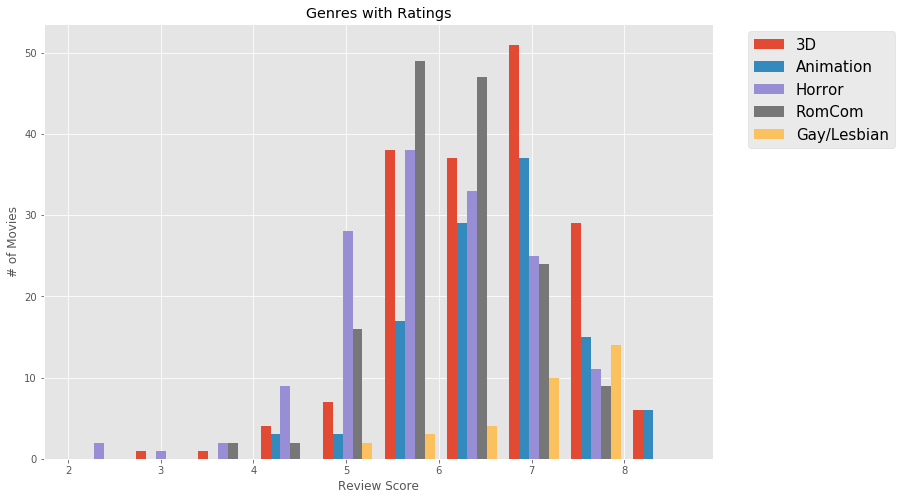

In [106]:
plt.figure(figsize=(12,8))


b = 10
labels = ['3D', 'Animation', 'Horror', 'RomCom', 'Gay/Lesbian']
r_3d = [i[0] for i in rate_3d]
r_an = [i[0] for i in rate_ani]
r_ho = [i[0] for i in rate_hor]
r_rc = [i[0] for i in rate_rc]
r_gl = [i[0] for i in rate_gl]
xlst = [r_3d, r_an, r_ho, r_rc, r_gl]
plt.hist(xlst, bins=b, label=labels)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 15})
plt.title("Genres with Ratings")
plt.ylabel('# of Movies')
plt.xlabel('Review Score')
plt.show()

[(120299061.0, '3D'), (76179839.0, 'Animation'), (32547500.0, 'Rom-Com'), (25328389.0, 'Horror'), (17421453.0, 'Gay/Lesbian')]


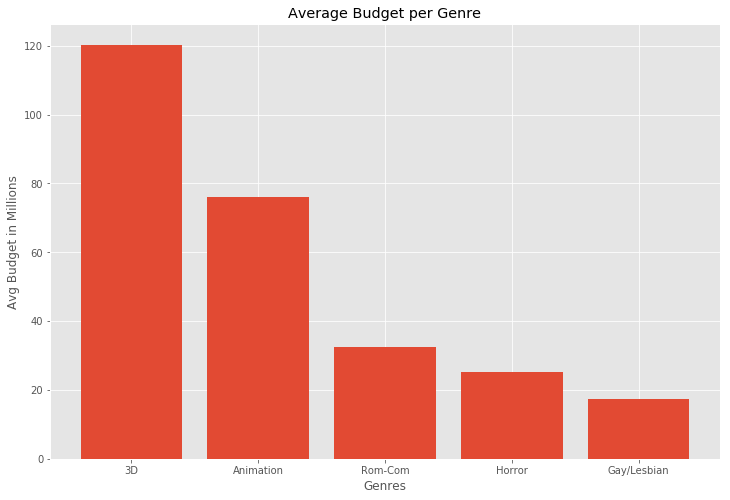

In [59]:
avg_bud = mysql('SELECT ROUND(AVG(budget), 0) AS average_budget, genre FROM Genres GROUP BY genre ORDER BY average_budget DESC;')

print(avg_bud)

x_bud = [i[1] for i in avg_bud]
y_bud = [i[0]/1000000 for i in avg_bud]

plt.figure(figsize=(12,8))
plt.bar(x_bud, y_bud)
plt.xlabel('Genres')
plt.ylabel('Avg Budget (in Millions)')
plt.title('Average Budget per Genre')
plt.show()


In [140]:
three_cat = mysql('SELECT ROUND(AVG(budget), 0) AS average_budget, ROUND(AVG(boxoffice-budget), 0) AS average_profit, ROUND(AVG(boxoffice/budget)) AS multiplier, genre FROM Genres GROUP BY genre;')
three_cat

mov_bud = [i[0]/1000000 for i in three_cat]
mov_prof = [i[1]/1000000 for i in three_cat]
mov_mult = [i[2] for i in three_cat]
mov_genre = [i[3] for i in three_cat]

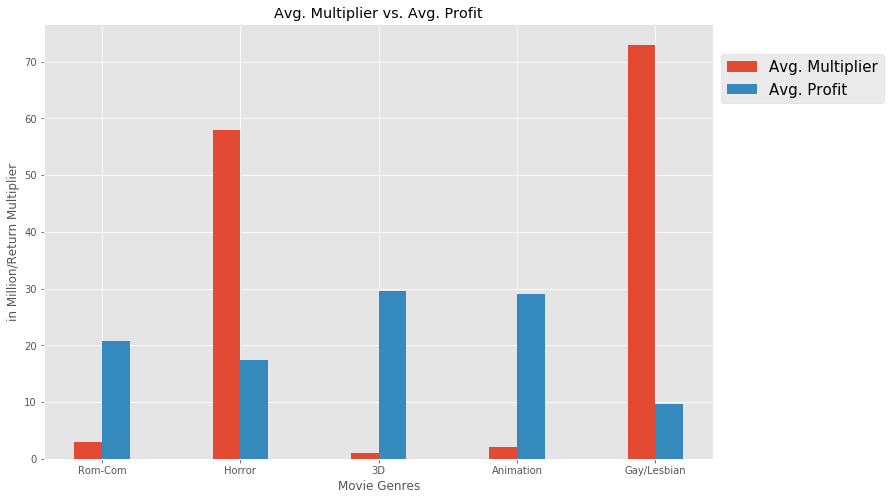

In [179]:
fig, ax = plt.subplots(figsize=(12,8))
w = 0.2
xgenre = np.arange(len(mov_genre))

ax.bar(xgenre-.1, mov_mult, width=w, label='Avg. Multiplier')
ax.bar(xgenre+.1, mov_prof, width=w, label='Avg. Profit')
plt.xticks(xgenre, mov_genre)
plt.title('Avg. Multiplier vs. Avg. Profit')
plt.ylabel('in Million/Return Multiplier')
plt.xlabel('Movie Genres')
plt.legend(bbox_to_anchor=(1,.8), loc="lower left", prop={'size': 15})
plt.show()
#fig.savefig('MultiVsProfit', bbox_extra_artists=(lgd,), bbox_inches='tight')